<a href="https://colab.research.google.com/github/achmadgani/colletothricum_model_development/blob/main/DS_ML_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Connect to the gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 4s (57.1 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
50 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping 

In [ ]:
from pyspark.sql import SparkSession

class DataReader:
    def __init__(self, spark: SparkSession):
        self.spark = spark

    def read_data(self, file_path: str, file_format: str = 'parquet', **options):
        """
        Read data from the specified path and format.

        :param file_path: The path to the data.
        :param file_format: The format of the data ('parquet', 'csv', 'json', etc.).
        :param options: Additional options for specific file formats (e.g., header=True for CSV).
        :return: Spark DataFrame with the loaded data.
        """
        if file_format == 'parquet':
            df = self.spark.read.parquet(file_path)
        elif file_format == 'csv':
            df = self.spark.read.csv(file_path, **options)
        elif file_format == 'json':
            df = self.spark.read.json(file_path)
        else:
            raise ValueError(f"Unsupported file format: {file_format}")

        return df

    def show_data(self, df, num_rows: int = 10):
        """
        Display the first few rows of the DataFrame.

        :param df: Spark DataFrame.
        :param num_rows: Number of rows to display.
        """
        df.show(num_rows)

# Example usage:
if __name__ == "__main__":
    # Initialize SparkSession
    spark = SparkSession.builder.appName("DataReader").getOrCreate()

    # Create an instance of DataReader
    data_reader = DataReader(spark)

    # Read partitioned Parquet data
    parquet_df = data_reader.read_data("/content/drive/MyDrive/病害診断データ/sardinia_dataset.parquet", file_format='parquet')

    # Show data
    data_reader.show_data(parquet_df)


+------------+--------------------+-------------------+
|    Severity|            Features|           Round_dt|
+------------+--------------------+-------------------+
|         0.0|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.009067589|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.005804699|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.036335725|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.002874286|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.005660323|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
|0.0032344782|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.012198447|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
| 0.008162663|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
|0.0014339951|[[23.85, 24.46, 2...|2020-05-15 16:00:00|
+------------+--------------------+-------------------+
only showing top 10 rows



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout

import torch
import torch.nn as nn
import torch.optim as optim

class MLAlgorithm:

    # TensorFlow/Keras basic neural network model
    @staticmethod
    def BasicNNModel(input_shape, hidden_units=128, output_units=1):
        """
        Builds a basic neural network model with a flattened input using TensorFlow/Keras.

        :param input_shape: Shape of the input data.
        :param hidden_units: Number of hidden units.
        :param output_units: Number of output units.
        :return: Compiled basic neural network model.
        """
        model = Sequential()
        model.add(Flatten(input_shape=input_shape))
        model.add(Dense(hidden_units, activation='relu'))
        model.add(Dense(output_units, activation='sigmoid'))

        model.compile(optimizer='adam', loss='mse')
        return model

    # TensorFlow/Keras LSTM model
    @staticmethod
    def LSTMModel(input_shape, units=50, output_units=1):
        """
        Builds an LSTM model using TensorFlow/Keras.

        :param input_shape: Shape of the input data (timesteps, features).
        :param units: Number of LSTM units.
        :param output_units: Number of output units.
        :return: Compiled LSTM model.
        """
        model = Sequential()
        model.add(LSTM(units, input_shape=input_shape))
        model.add(Dense(output_units, activation='sigmoid'))

        model.compile(optimizer='adam', loss='mse')
        return model

    @staticmethod
    def LSTMModel_v2(input_shape, lstm_units=[50, 50], dense_units=[32], output_units=1, dropout_rate=0.2):
      """
      Builds a more complex LSTM model using TensorFlow/Keras.

      :param input_shape: Shape of the input data (timesteps, features).
      :param lstm_units: List of LSTM units for each LSTM layer.
      :param dense_units: List of dense units for each Dense layer after the LSTM layers.
      :param output_units: Number of output units.
      :param dropout_rate: Dropout rate to be applied after each LSTM layer.
      :return: Compiled LSTM model.
      """
      model = Sequential()

      # Adding multiple LSTM layers with Dropout
      for i, units in enumerate(lstm_units):
          if i == 0:
              # First LSTM layer requires the input_shape
              model.add(LSTM(units, input_shape=input_shape, return_sequences=True))
          else:
              # Subsequent LSTM layers
              model.add(LSTM(units, return_sequences=(i < len(lstm_units) - 1)))  # Only return sequences if there are more LSTM layers after this one
          model.add(Dropout(dropout_rate))  # Apply Dropout after each LSTM layer

      # Adding Dense layers after LSTM layers
      for units in dense_units:
          model.add(Dense(units, activation='relu'))

      # Output layer
      model.add(Dense(output_units, activation='sigmoid'))

      # Compile the model
      model.compile(optimizer='adam', loss='mse')

      return model


    # PyTorch LSTM model
    @staticmethod
    def LSTMModelPyTorch(input_size, hidden_size=50, output_size=1, num_layers=1):
        """
        Builds an LSTM model using PyTorch.

        :param input_size: Number of input features.
        :param hidden_size: Number of LSTM units.
        :param output_size: Number of output units.
        :param num_layers: Number of LSTM layers.
        :return: PyTorch LSTM model and optimizer.
        """
        class LSTMModel(nn.Module):
            def __init__(self, input_size, hidden_size, output_size, num_layers):
                super(LSTMModel, self).__init__()
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
                self.fc = nn.Linear(hidden_size, output_size)

            def forward(self, x):
                h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
                c_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)

                out, _ = self.lstm(x, (h_0, c_0))
                out = self.fc(out[:, -1, :])
                return out

        model = LSTMModel(input_size, hidden_size, output_size, num_layers)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        return model, optimizer

In [ ]:
from pyspark.sql.functions import udf, col, lit
from pyspark.sql.types import StringType, DoubleType, ArrayType
import pyspark.sql.functions as F

# BASIC NN MODEL PREPROCESSING
def transpose_features(features):
    return list(map(list, zip(*features)))

def min_max_scale(value, min_value, max_value):
    if max_value == min_value:
        return 0.0  # Avoid division by zero
    return (value - min_value) / (max_value - min_value)

# Registering the UDFs
transpose_udf = udf(transpose_features, ArrayType(ArrayType(DoubleType())))
min_max_scale_udf = udf(lambda x, min_val, max_val: min_max_scale(x, min_val, max_val), DoubleType())

# Apply the UDF to transpose the Features column and update the parquet_df in place
cleaned_df = parquet_df.withColumn("Features", transpose_udf(F.col("Features")))

# # Show the result after transposition
# cleaned_df.select("Features", "Severity", "Round_dt").show(5, truncate=False)

# Find the minimum and maximum of the 'Severity' column
min_severity = cleaned_df.agg({"Severity": "min"}).collect()[0][0]
max_severity = cleaned_df.agg({"Severity": "max"}).collect()[0][0]

# Apply the UDF to scale the 'Severity' column
cleaned_df = cleaned_df.withColumn(
    "Severity",
    min_max_scale_udf(col("Severity"), lit(min_severity), lit(max_severity))
)

# Show the result after scaling
cleaned_df.select("Severity", "Round_dt","Features").show(5, truncate=False)


+--------------------+-------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Get lists of features and labels
features, labels = cleaned_df.select("Features").rdd.map(lambda row: row["Features"]).collect(), cleaned_df.select("Severity").rdd.map(lambda row: row["Severity"]).collect()

# Convert the lists to NumPy arrays
features_np = np.array(features, dtype=np.float32)
labels_np = np.array(labels, dtype=np.float32)
labels_np = labels_np.reshape(-1, 1)

# Step 1: Split into training (60%) and temp (40%)
features_train, features_temp, labels_train, labels_temp = train_test_split(
    features_np, labels_np, test_size=0.4, random_state=42
)

# Step 2: Split temp into validation (50% of temp, which is 20% of original) and test (50% of temp, which is 10% of original)
features_val, features_test, labels_val, labels_test = train_test_split(
    features_temp, labels_temp, test_size=0.5, random_state=42
)

# Print the shapes of the resulting splits
print(f"Training Features shape: {features_train.shape}")
print(f"Validation Features shape: {features_val.shape}")
print(f"Test Features shape: {features_test.shape}")
print(f"Training Labels shape: {labels_train.shape}")
print(f"Validation Labels shape: {labels_val.shape}")
print(f"Test Labels shape: {labels_test.shape}")

Training Features shape: (357, 48, 9)
Validation Features shape: (119, 48, 9)
Test Features shape: (119, 48, 9)
Training Labels shape: (357, 1)
Validation Labels shape: (119, 1)
Test Labels shape: (119, 1)


In [ ]:
import numpy as np

first_row = parquet_df.select("Features").first()

# Get the shape of the Features column
if first_row and first_row["Features"]:
    outer_length = len(first_row["Features"])  # Number of timesteps
    inner_length = len(first_row["Features"][0])  # Number of features
    input_shape = (inner_length, outer_length)
else:
    input_shape = (0, 0)  # Handle case when Features is empty
print(input_shape)
model = MLAlgorithm.BasicNNModel(input_shape)



# Train the model
model.fit(features_train, labels_train, epochs=50, batch_size=32, validation_data=(features_val, labels_val), verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(features_test, labels_test)
print(f"Test set loss: {test_loss}")

# # Make predictions on the test set
# test_predictions = model.predict(features_test)
# print(test_predictions)

(48, 9)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099     
Test set loss: 0.01302503515034914


In [ ]:
model = MLAlgorithm.LSTMModel(input_shape)

# Train the model
history = model.fit(features_train, labels_train, epochs=50, batch_size=32, validation_data=(features_val, labels_val), verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(features_test, labels_test)
print(f"Test set loss: {test_loss}")

# # Make predictions on the test set
# test_predictions = model.predict(features_test)
# print(test_predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 
Test set loss: 0.01227487251162529


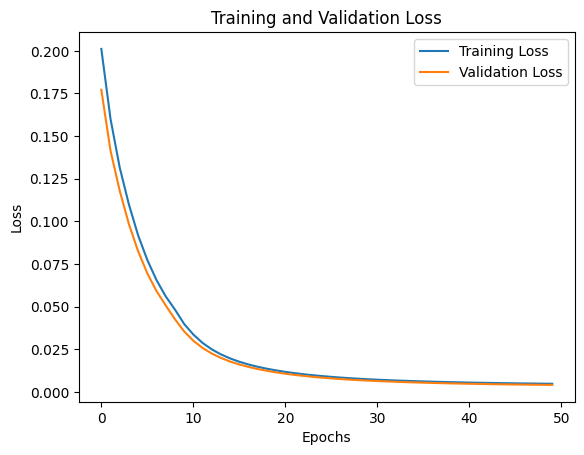

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model = MLAlgorithm.LSTMModel_v2(input_shape)

# Train the model
history = model.fit(features_train, labels_train, epochs=50, batch_size=32, validation_data=(features_val, labels_val), verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(features_test, labels_test)
print(f"Test set loss: {test_loss}")

# # Make predictions on the test set
# test_predictions = model.predict(features_test)
# print(test_predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087    
Test set loss: 0.011553299613296986


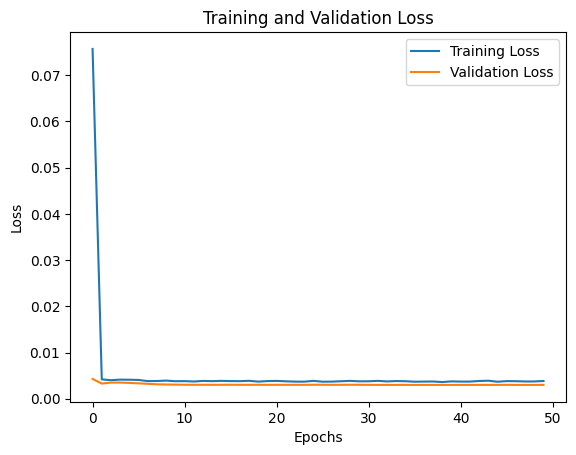

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()